In [1]:
import numpy as np
import matplotlib.pyplot as plt
import model

# Model Setup

In [2]:
folder = 'two-dim-nb'
m = model.TwoDim()
m.initmean(0, 2e-11)

In [3]:
m.initnum(5e5, 128, 5000.)
m.initq(1e-4*np.random.rand(128, 128, m.nz))
m.snapshot(folder)

m.nu = 2.5e46*4.**20
m.diffexp = 20
m.hypodiff = 1e-16

# Run

In [4]:
for i in range(100):
    m.timestep()
    m.screenlog()
    if m.clock % 250000. < m.dt/10 or m.clock % 250000. - 250000. > -m.dt/10:
        m.save(folder)
        m.snapshot(folder)

            5000 5.415969e-10
           10000 5.049843e-10
           15000 4.842724e-10
           20000 4.697109e-10
           25000 4.583744e-10
           30000 4.489877e-10
           35000 4.408575e-10
           40000 4.335597e-10
           45000 4.268325e-10
           50000 4.205270e-10
           55000 4.145708e-10
           60000 4.089330e-10
           65000 4.035952e-10
           70000 3.985336e-10
           75000 3.937134e-10
           80000 3.890950e-10
           85000 3.846426e-10
           90000 3.803322e-10
           95000 3.761522e-10
          100000 3.720997e-10
          105000 3.681740e-10
          110000 3.643727e-10
          115000 3.606913e-10
          120000 3.571246e-10
          125000 3.536680e-10
          130000 3.503164e-10
          135000 3.470608e-10
          140000 3.438849e-10
          145000 3.407657e-10
          150000 3.376781e-10
          155000 3.346031e-10
          160000 3.315341e-10
          165000 3.284773e-10
          

# Plots

/var/folders/1v/vs6qp9zd1q5fcwjppjmyzyrm0000gn/T/ipykernel_24828/2595652874.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(m.k[0, :, 0], m.l[:, 0, 0], np.real(m.q[:, :, 0]), cmap='RdBu_r', vmin=-qmax, vmax=qmax)


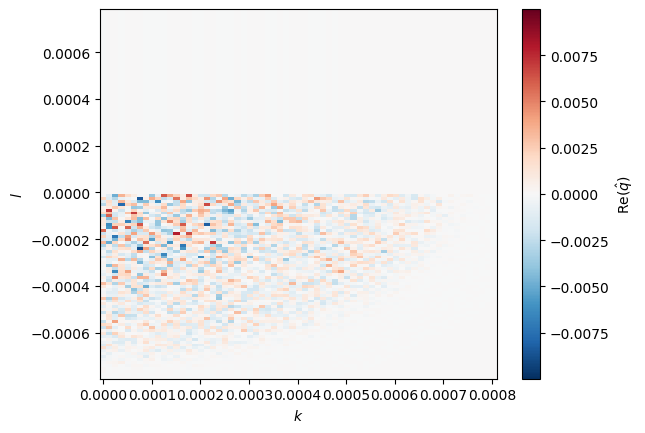

In [5]:
fig, ax = plt.subplots(1)
qmax = np.max(np.abs(m.q[:, :, 0]))
im = ax.pcolormesh(m.k[0, :, 0], m.l[:, 0, 0], np.real(m.q[:, :, 0]), cmap='RdBu_r', vmin=-qmax, vmax=qmax)
plt.colorbar(im, ax=ax, label=r'Re($\hat{q}$)')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$l$')
plt.show()

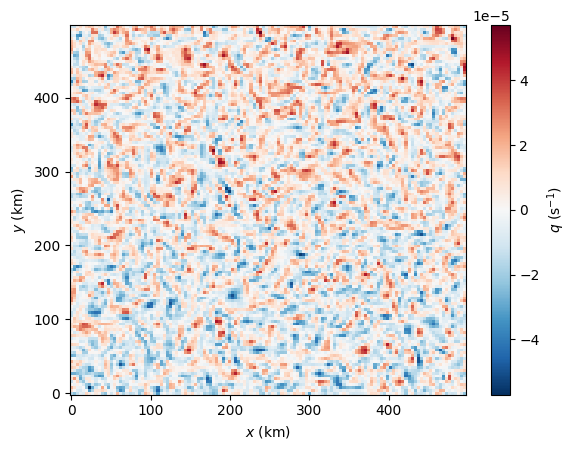

In [6]:
qp = m.irfft2(m.q, axes=(0, 1))
qp += m.qx * (m.x - m.a / 2)
qp += m.qy * (m.y - m.a / 2)
qrmax = np.max(np.abs(qp[:, :, 0]))
fig, ax = plt.subplots(1)
im = ax.pcolormesh(m.x[0, :, 0]/1e3, m.y[:, 0, 0]/1e3, qp[:, :, 0], cmap='RdBu_r', vmin=-qrmax, vmax=qrmax)
plt.colorbar(im, ax=ax, label=r'$q$ (s$^{-1}$)')
ax.set_xlabel(r'$x$ (km)')
ax.set_ylabel(r'$y$ (km)')
plt.show()

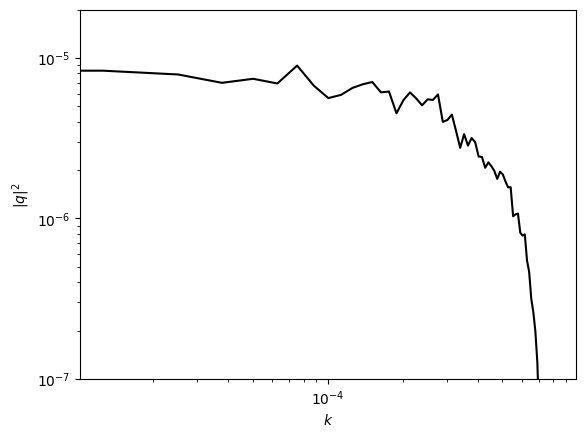

In [ ]:
ens = np.mean(np.abs(m.q[:, :, 0])**2, axis=0)
fig, ax = plt.subplots(1)
ax.plot(m.k[0, :, 0], ens, 'k-')
ax.set_ylim(1e-7, 2e-5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$|q|^2$')
plt.show()

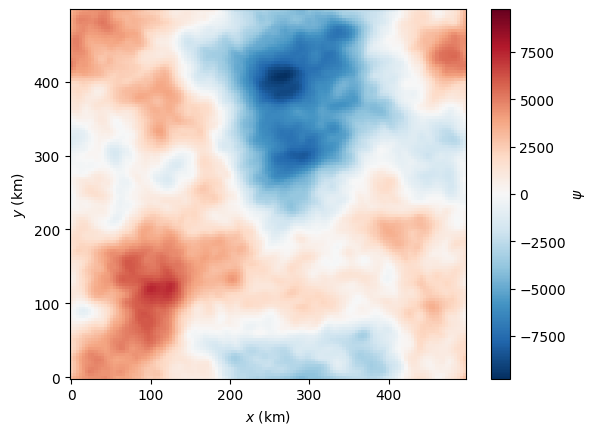

In [8]:
p = np.empty((m.l.size, m.k.size, m.nz), dtype=complex)
for i in range(m.l.size):
    for j in range(m.k.size):
        p[i, j, :] = np.linalg.solve(m.L[i, j, :, :], m.q[i, j, :])
pp = m.irfft2(p, axes=(0, 1))
ppmax = np.max(np.abs(pp[:, :, 0]))
fig, ax = plt.subplots(1)
im = ax.pcolormesh(m.x[0, :, 0]/1e3, m.y[:, 0, 0]/1e3, pp[:, :, 0], cmap='RdBu_r', vmin=-ppmax, vmax=ppmax)
plt.colorbar(im, ax=ax, label=r'$\psi$')
ax.set_xlabel(r'$x$ (km)')
ax.set_ylabel(r'$y$ (km)')
plt.show()

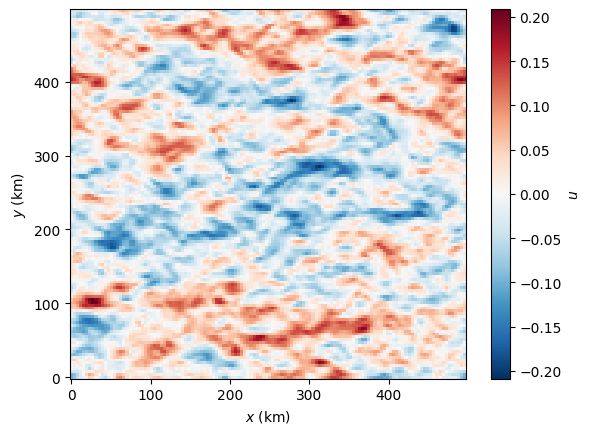

In [9]:
u = 1j*m.l*p
up = m.u[0] + m.irfft2(u, axes=(0, 1))
umax = np.max(np.abs(up[:, :, 0]))
fig, ax = plt.subplots(1)
im = ax.pcolormesh(m.x[0, :, 0]/1e3, m.y[:, 0, 0]/1e3, up[:, :, 0], cmap='RdBu_r', vmin=-umax, vmax=umax)
plt.colorbar(im, ax=ax, label=r'$u$')
ax.set_xlabel(r'$x$ (km)')
ax.set_ylabel(r'$y$ (km)')
plt.show()

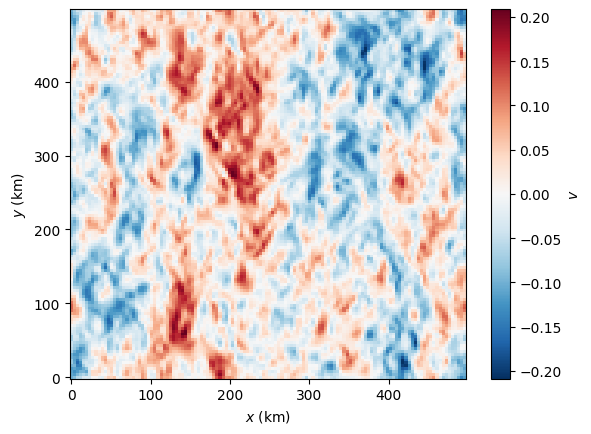

In [10]:
v = -1j*m.k*p
vp = m.v[0] + m.irfft2(v, axes=(0, 1))
vmax = np.max(np.abs(up[:, :, 0]))
fig, ax = plt.subplots(1)
im = ax.pcolormesh(m.x[0, :, 0]/1e3, m.y[:, 0, 0]/1e3, vp[:, :, 0], cmap='RdBu_r', vmin=-vmax, vmax=vmax)
plt.colorbar(im, ax=ax, label=r'$v$')
ax.set_xlabel(r'$x$ (km)')
ax.set_ylabel(r'$y$ (km)')
plt.show()

In [11]:
kep = 1/2*(up**2 + vp**2)
print('Mean KE =', np.mean(kep[:, :, 0]))

Mean KE = 0.0037919567959768035


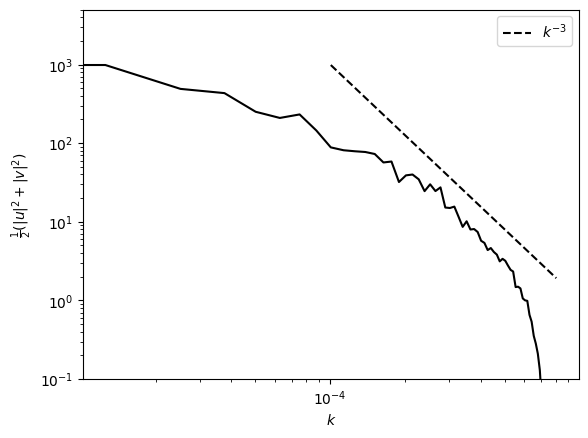

In [ ]:
ke = np.mean(1/2*(np.abs(u)**2 + np.abs(v)**2), axis=0)
fig, ax = plt.subplots(1)
ax.plot(m.k[0, :, 0], ke, 'k-')
kvals = m.k[np.where(np.logical_and(m.k >= 1e-4, m.k <= 1e-3))]
ax.plot(kvals, 1e-9*kvals**-3, 'k--', label=r'$k^{-3}$')
ax.set_ylim(1e-1, 5e3)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$\frac{1}{2}(|u|^2 + |v|^2)$')
plt.show()

# Estimate spectral slope

c = 2.9636536005467367e-09
n = -2.7548662090094616


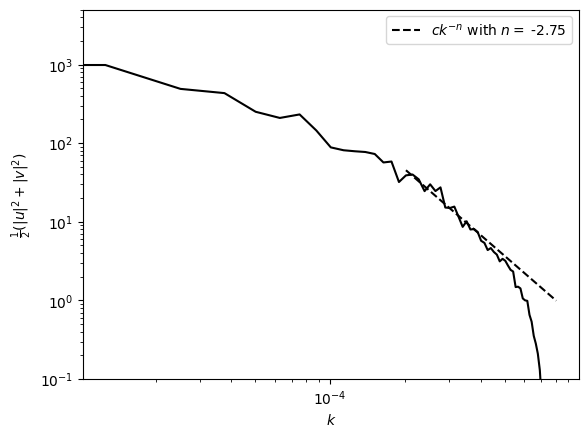

In [ ]:
def f(k, c, n):
    return c*k**n

from scipy.optimize import curve_fit
krange = np.where(np.logical_and(m.k[0, :, 0] >= 2e-4, m.k[0, :, 0] <= 1e-3))
popt, pcov = curve_fit(f, m.k[0, krange, 0][0], ke[krange][:, 0], p0=[1e-9, -3])
print('c =', popt[0])
print('n =', popt[1])

fig, ax = plt.subplots(1)
ax.plot(m.k[0, :, 0], ke, 'k-')
ax.plot(m.k[0, krange, 0][0], f(m.k[0, krange, 0][0], *popt), 'k--', label=r'$c k^{-n}$ with $n = $ ' + f'{popt[1]:.2f}')
ax.set_ylim(1e-1, 5e3)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$\frac{1}{2}(|u|^2 + |v|^2)$')
plt.show()